In [97]:
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, auc

In [103]:
testfile = 'Bladder Project pCR Prediction Data (Updated 030222).txt'
df=pd.read_csv(testfile,sep='\t',index_col=0)
display(df)

,pCR,Age,Sex,Race,Urothelial,Smoking,NAC,MIBC,Incidental PC,utDNA,TF99
ID,,,,,,,,,,,
WBC1045,0,63,1,1,1,1,1,1,1,2.4,2.400
WBC1050,1,63,2,1,1,1,1,1,0,0.0,2.500
WBC1058,0,78,1,1,1,0,0,1,0,5.9,2.400
WBC1062,0,77,1,1,0,1,1,1,0,2.4,1.600
WBC1063,1,67,1,1,1,0,1,1,0,0.0,1.700
...,...,...,...,...,...,...,...,...,...,...,...
WBC1312,1,61,1,1,1,0,1,0,0,0.0,0.000
WBC1313,0,48,1,1,0,0,1,1,0,1.9,18.300
WBC1314,1,73,2,1,1,1,1,1,0,0.3,0.000


In [104]:
# Perform operation on utDNA and TF99 and drop the unwanted columns
df_test = df.copy()
df_test['Operation'] = np.power((np.array(df['utDNA']) + 1) * (np.array(df['TF99']) + 1), 1.5)
df_test = df_test[['pCR', 'Age', 'Sex', 'Race', 'Urothelial', 'Smoking', 'NAC', 'MIBC', 'Operation']]
display(df_test)

,pCR,Age,Sex,Race,Urothelial,Smoking,NAC,MIBC,Operation
ID,,,,,,,,,
WBC1045,0,63,1,1,1,1,1,1,39.304000
WBC1050,1,63,2,1,1,1,1,1,6.547900
WBC1058,0,78,1,1,1,0,0,1,113.629740
WBC1062,0,77,1,1,0,1,1,1,26.283210
WBC1063,1,67,1,1,1,0,1,1,4.436553
...,...,...,...,...,...,...,...,...,...
WBC1312,1,61,1,1,1,0,1,0,1.000000
WBC1313,0,48,1,1,0,0,1,1,418.728923
WBC1314,1,73,2,1,1,1,1,1,1.482228


In [105]:
# create loocv procedure
cv = LeaveOneOut()
X=df_test.drop(['pCR'],axis=1).to_numpy()
y=df_test["pCR"].copy().to_numpy()

# enumerate splits
y_true, y_pred, y_proba = list(), list(), list()

for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # fit model
    model = RandomForestClassifier(n_estimators=2000, random_state=1)
    model.fit(X_train, y_train)
    
    # evaluate model
    yhat = model.predict(X_test)
    yprob = model.predict_proba(X_test)[:,1]
    
    y_proba.append(yprob)
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.716


In [106]:
cm1 = confusion_matrix(y_true, y_pred)
spec_pred = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sens_pred = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity =', sens_pred)
print('Specificity =', spec_pred)

Sensitivity = 0.8
Specificity = 0.6410256410256411


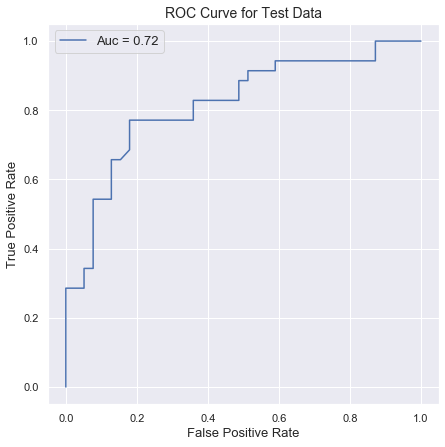

In [107]:
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
auc_test = metrics.roc_auc_score(y_true, y_pred)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(fpr, tpr, label='Auc = ' + str(np.around(auc_test, decimals=2)))
ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)
ax.set_title('ROC Curve for Test Data', fontsize=14)
plt.legend(fontsize=13)